In [10]:
import pandas as pd

df = pd.read_csv('C:\\Users\Goglo4k\Desktop\gini_by_country.csv')
#Данные указывающие на коэффициет Джини для стран в различных годах.
#0 - расслоения по доходом в обществе нет, 1 - доходы сосредоточены в руках одного человека или группы людей.
#Ссылка на датасет: https://www.kaggle.com/datasets/ulrikthygepedersen/gini-index-per-country
df.head()

,country_code,country_name,year,value
0,AGO,Angola,2000,52.0
1,AGO,Angola,2008,42.7
2,AGO,Angola,2018,51.3
3,ALB,Albania,1996,27.0
4,ALB,Albania,2002,31.7


In [12]:
df.columns
#country_code - код страны
#country_name - название страны
#year - год расчета коэффициента Джини
#value - рассчитанный коэффициента Джини 

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [21]:
print(df['year'].mean(), df['year'].median(), df['year'].var(), df['year'].std())
#Среднее значение, медиана, дисперсия и СКО для года расчета

2006.2758438818566 2008.0 87.39985944580013 9.348789196778378


In [23]:
print(df['value'].mean(), df['value'].median(), df['value'].var(), df['value'].std())
#Среднее значение, медиана, дисперсия и СКО для коэффициента Джини

38.17932489451477 36.1 82.4035195439919 9.077638434306133


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Year distribution')

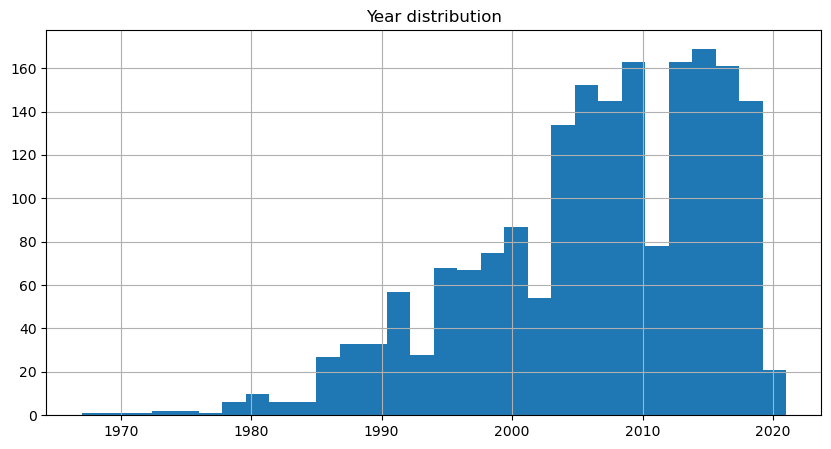

In [29]:
plt.figure(figsize=(10,5))
plt.hist(df['year'], bins=30)
plt.grid(True)
plt.title('Year distribution')
#Гистаграмма распределения годов расчетов коэффициента.

Text(0.5, 1.0, 'Value distribution')

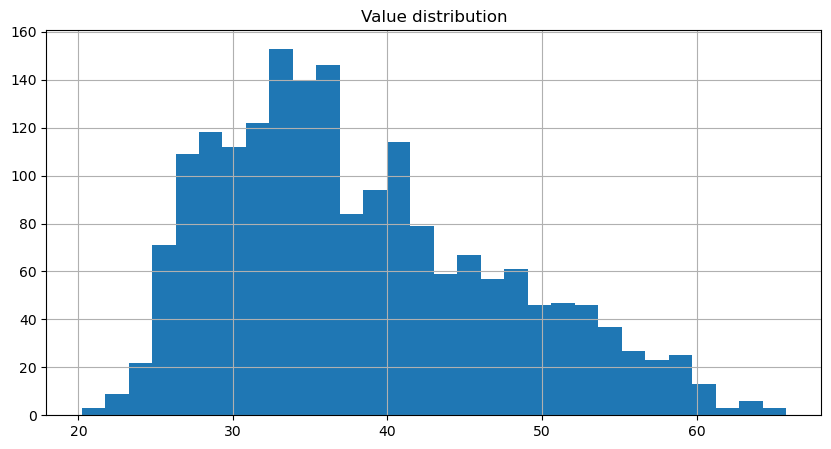

In [31]:
plt.figure(figsize=(10,5))
plt.hist(df['value'], bins=30)
plt.grid(True)
plt.title('Value distribution')
#Гистаграмма распределения рассчитанных коэффициентов Джини.

Text(0.5, 1.0, 'Country code distribution')

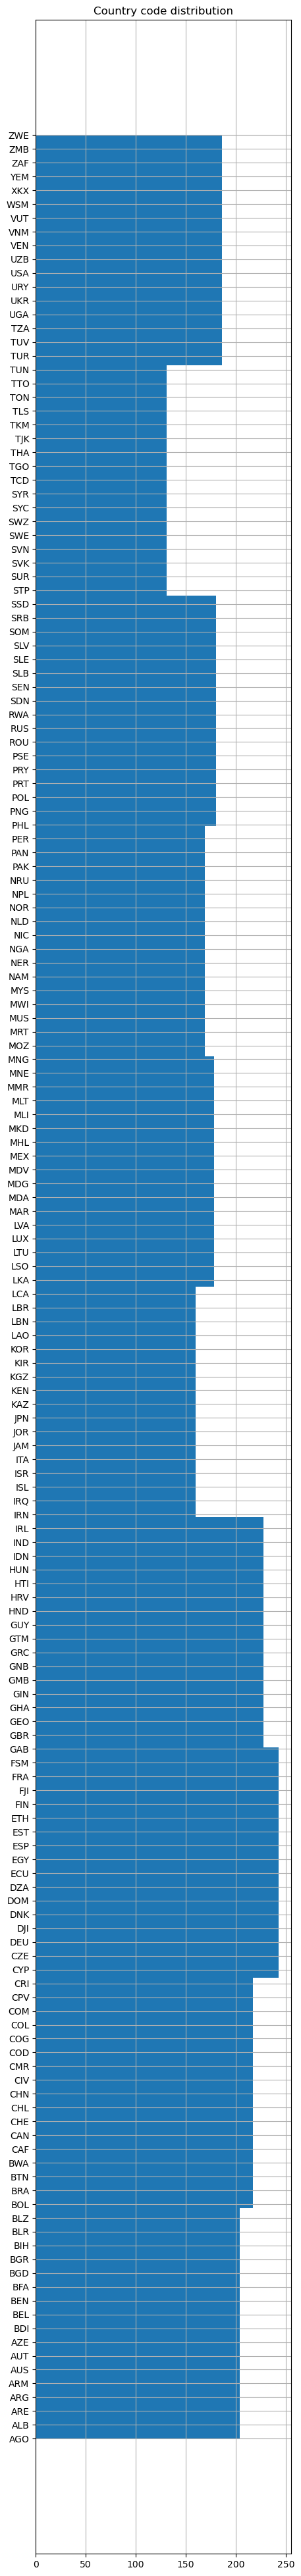

In [51]:
plt.figure(figsize=(5,50))
plt.hist(df['country_code'], bins=10, orientation='horizontal')
plt.grid(True)
plt.title('Country code distribution')
#Гистаграмма распределения кодов стран.

Text(0.5, 1.0, 'Country name distribution')

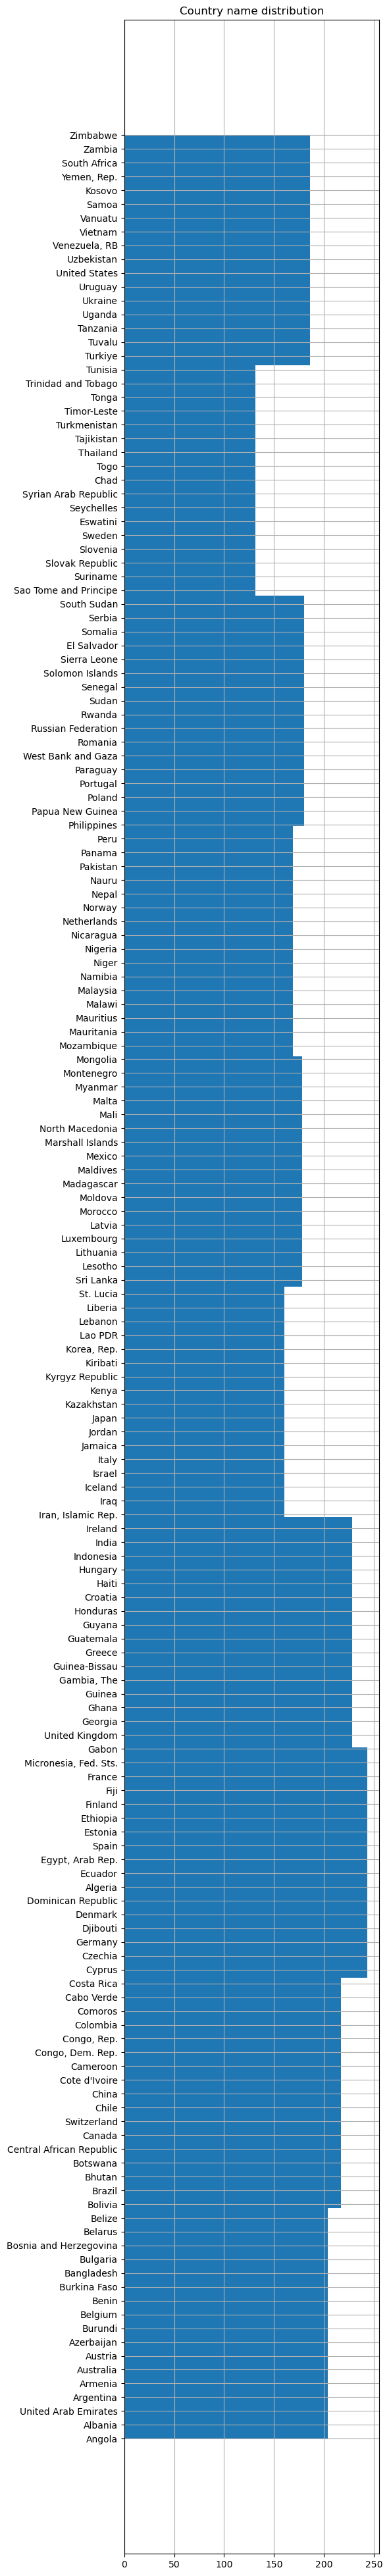

In [53]:
plt.figure(figsize=(5,50))
plt.hist(df['country_name'], bins=10, orientation='horizontal')
plt.grid(True)
plt.title('Country name distribution')
#Гистаграмма распределения названий стран.

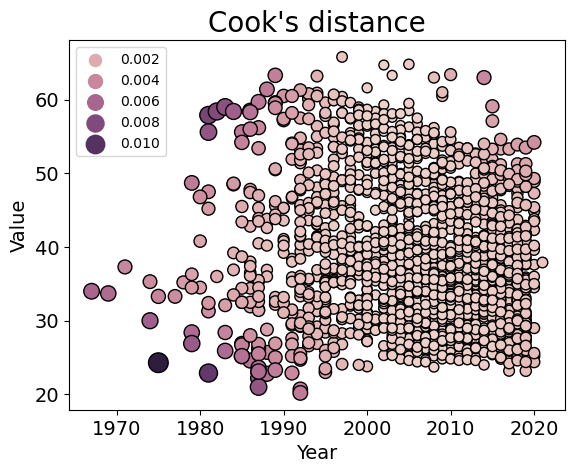

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns

#Построим модель 
f = 'year ~ value'
model = ols(formula=f, data=df).fit()

#Рассчет расстояния Кука
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

#Строим график
sns.scatterplot(data = df, x = df.year, y = df.value, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Загаловки
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

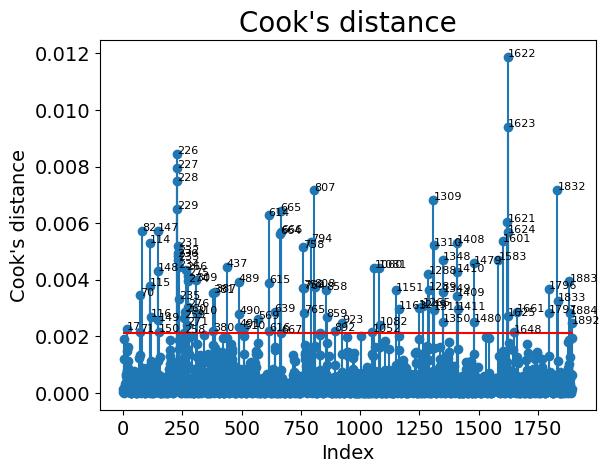

In [74]:
#В датасете 1897 наблюдений. Используем расстояние Кука для определения выбросов
threshold = 4/1897

# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 1900, 'r')

# the observations with Cook's distances higher than the threshold value are labeled in the plot
influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    plt.text(index, value, str(index), fontsize=8)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Заголовки
plt.xlabel('Index', fontsize=14)
plt.ylabel('Cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

#Как видно на графике, множество индексов измерений имеют расстояние Кука, превышающие пороговое значение. Т.к. данными являются достоверными, удаление этих данных из датасета не рекомендуется.

In [78]:
df.isnull().sum()
#В данном датасете пропущенные значения отсутствуют. Дополнение не требуется. 
#В случае их наличия стоит обращаться к официальным источникам по стране для расчета коэффициента Джини и дополнения существующего датасета

country_code    0
country_name    0
year            0
value           0
dtype: int64

In [83]:
#Рассчитаем коэффициент коррелиации между двумя столбцами
df['year'].corr(df['value'])
#Коэффициент близок к нулю, что означает, что коррелиации между годом расчета коэффициента Джини и самим коэффициентом Джини скорее всего нет. 
#Если коррелиация и имеется, то она отрицательная - с более поздним годом получением данных уменьшается коэффициент Джини.

-0.17402595568646162

<Axes: xlabel='year', ylabel='value'>

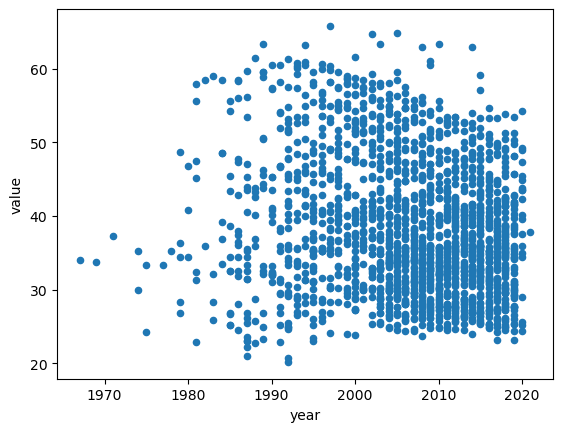

In [84]:
df.plot.scatter(x = 'year', y = 'value')
#По полученным данным на графике визуально видно, что коррелиация между значениями скорее всего не наблюдается, т.к. точки расположенны хаотично.